# An analysis of the 2015 NET December results


We get our info from [the PDF here](http://cbsenet.nic.in/CMS/Handler/FileHandler.ashx?i=File&ii=7&iii=Y) which states **Complete Result of candidates qualified UGC NET December 2015**.
To get started we import some tools.

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
%pylab inline

Populating the interactive namespace from numpy and matplotlib


/home/arjoonn/dev/kaggle/env/lib/python3.5/site-packages/matplotlib/__init__.py:872: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


# Seeing the Data
The data is in PDF form so some cleaning is required to cet it into csv format.
After that is done, we load it in to the notebook and see what columns need a bit of change.

In [86]:
df = pd.read_csv('net.csv')
df.drop(['SNo', 'RollNo'], 1, inplace=True)
df.Sex = df.Sex == 'M'

# We calculate percentages
df['P1p'] = df.P1 / 100
df['P2p'] = df.P2 / 100
df['P3p'] = df.P3 / 150
df['Gtp'] = df.Gtotal / 350

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23500 entries, 0 to 23499
Data columns (total 13 columns):
Subect        23500 non-null int64
Sex           23500 non-null bool
Caty          23500 non-null object
PWDApplFor    23500 non-null object
P1            23500 non-null int64
P2            23500 non-null int64
P3            23500 non-null int64
Gtotal        23500 non-null int64
Status        23500 non-null object
P1p           23500 non-null float64
P2p           23500 non-null float64
P3p           23500 non-null float64
Gtp           23500 non-null float64
dtypes: bool(1), float64(4), int64(5), object(3)
memory usage: 2.1+ MB


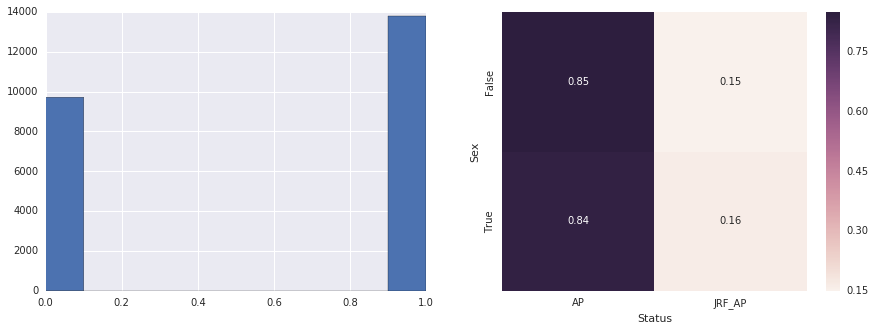

In [100]:
plt.figure(figsize=(15, 5))
plt.subplot(121)
df.Sex.hist()
plt.subplot(122)
sns.heatmap(pd.crosstab(df.Sex, df.Status).apply(lambda x:x/x.sum(), axis=1), annot=True)

- So now we know that there are more males sitting for the exams than there are females.
- Also that females have a slightly higher success rate.

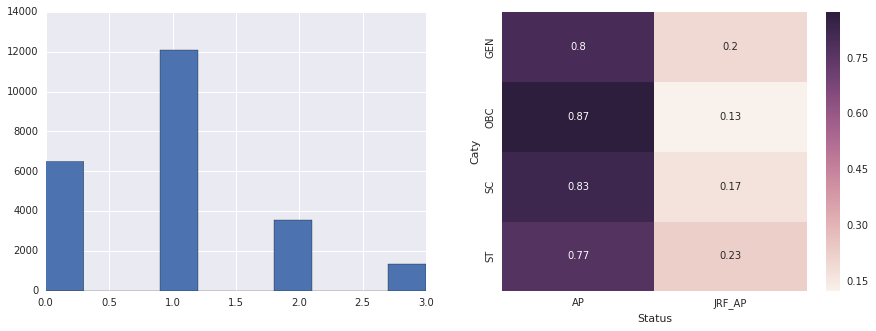

In [101]:
mapp = {'GEN': 0,
        'OBC': 1,
        'SC': 2,
        'ST': 3,
       }
plt.figure(figsize=(15, 5))
plt.subplot(121)
df.Caty.map(mapp).hist()
plt.subplot(122)
sns.heatmap(pd.crosstab(df.Caty, df.Status).apply(lambda x:x/x.sum(), axis=1), annot=True)

- OBC category sees highest number of applications.
- It also enjoys the lowest JRF allocation rate.

[('GEN', 'red'), ('OBC', 'green'), ('SC', 'blue'), ('ST', 'yellow')]


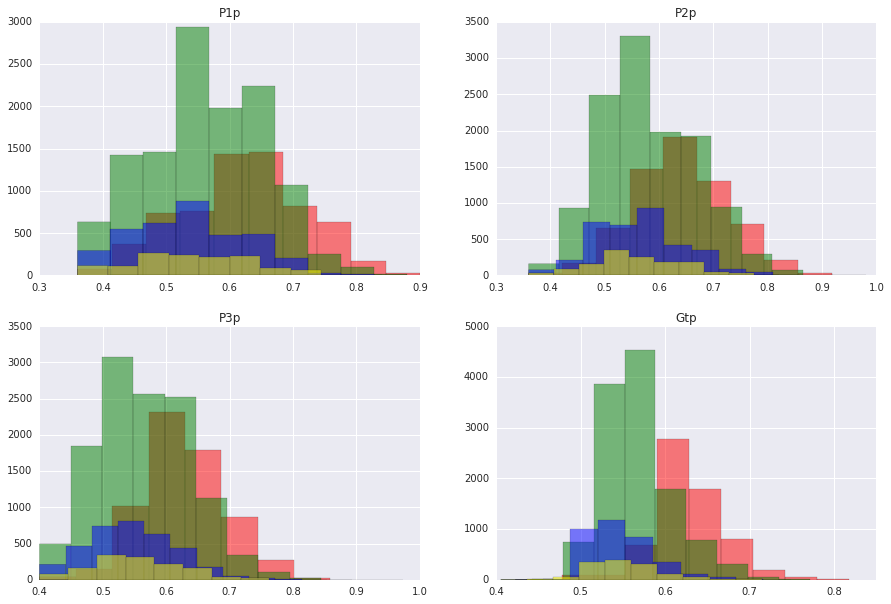

In [88]:
def plot_marks_by_x(df, x):
    plt.figure(figsize=(15, 10))
    uq = [i for i in df[x].unique()]
    uq.sort()
    colors = ['red', 'green', 'blue', 'yellow', 'black', 'white']
    print(list(zip(uq, colors)))
    for i, c in enumerate(['P1p', 'P2p', 'P3p', 'Gtp']):
        plt.subplot(2,2,i+1)
        for sb, col in zip(uq, colors):
            df.loc[df[x] == sb, c].hist(alpha=0.5, color=col)
        plt.title(c)
plot_marks_by_x(df, 'Caty')

- Marks are distributed mostly the same for all Categories.
- The General category seems to have moved ahead in the mean compared to other reserved categories.
- We will check this in the next cell.

[(False, 'red'), (True, 'green')]


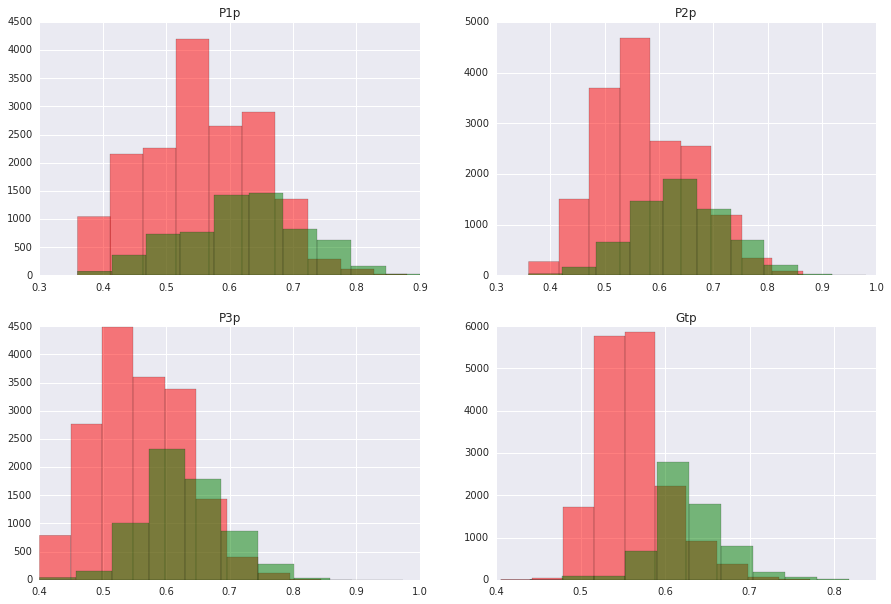

In [102]:
df['notReserved'] = df.Caty == 'GEN'
plot_marks_by_x(df, 'notReserved')

- As expected reservation and lower mean are correlated. Not a causal relation though.

[(False, 'red'), (True, 'green')]


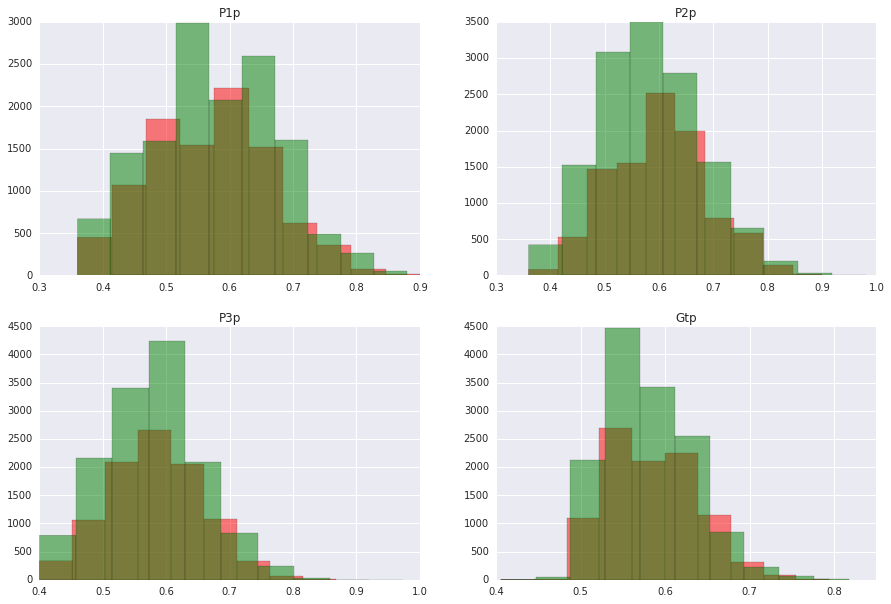

In [89]:
plot_marks_by_x(df, 'Sex')

Sex does not seem to have an effect on hwo people perform on the exams.

# Now for Computer Science

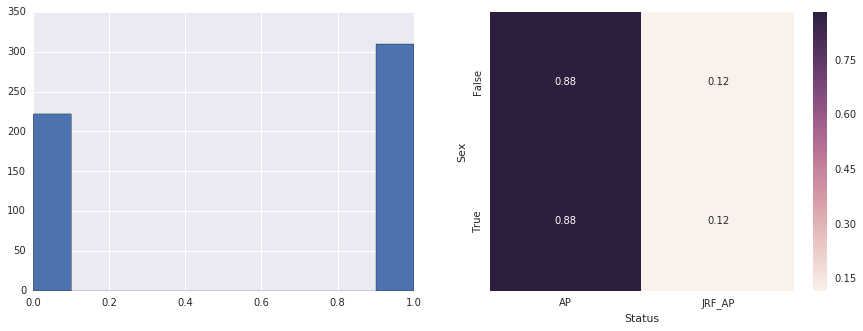

In [105]:
cdf = df.loc[df.Subect == 87]
plt.figure(figsize=(15, 5))
plt.subplot(121)
cdf.Sex.hist()
plt.subplot(122)
sns.heatmap(pd.crosstab(cdf.Sex, cdf.Status).apply(lambda x:x/x.sum(), axis=1), annot=True)

- Again males are more in number.
- Both males and females enjoy the same JRF conversion.

[('GEN', 'red'), ('OBC', 'green'), ('SC', 'blue'), ('ST', 'yellow')]


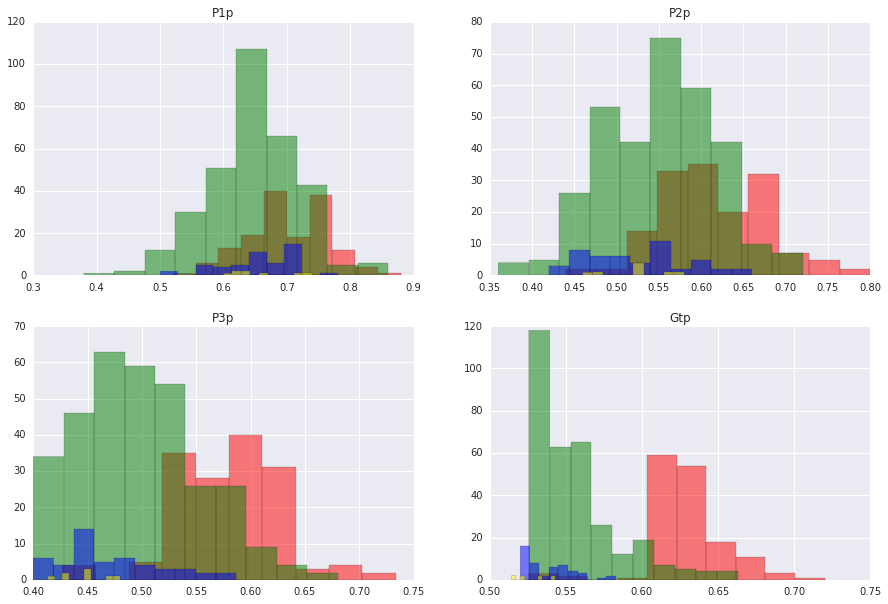

In [91]:
plot_marks_by_x(cdf, 'Caty')

- This is interesting as Paper1 and Paper2 are almost similar but when you aggregate them, GEN category pulls ahead.

[(False, 'red'), (True, 'green')]


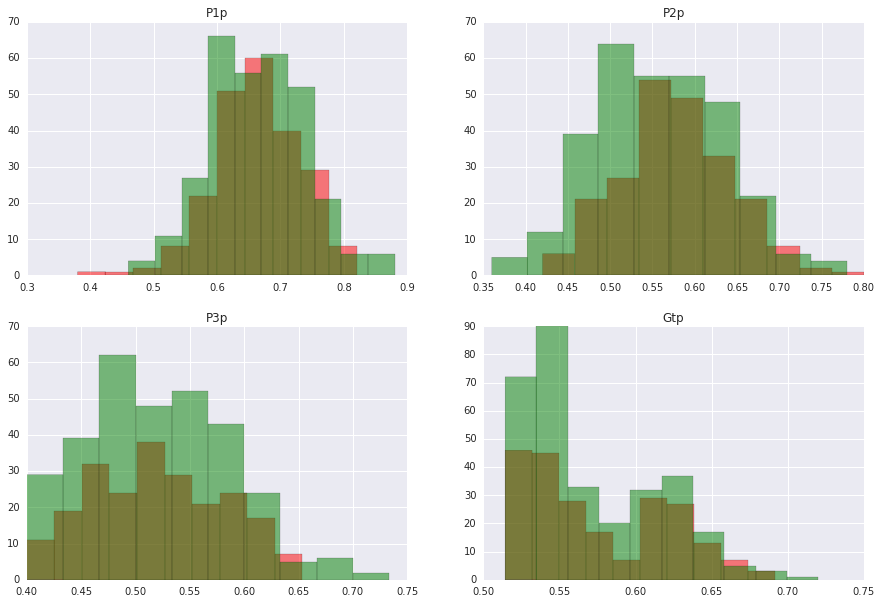

In [92]:
plot_marks_by_x(cdf, 'Sex')

- Again as expected, Sex has no effect.

[('AP', 'red'), ('JRF_AP', 'green')]


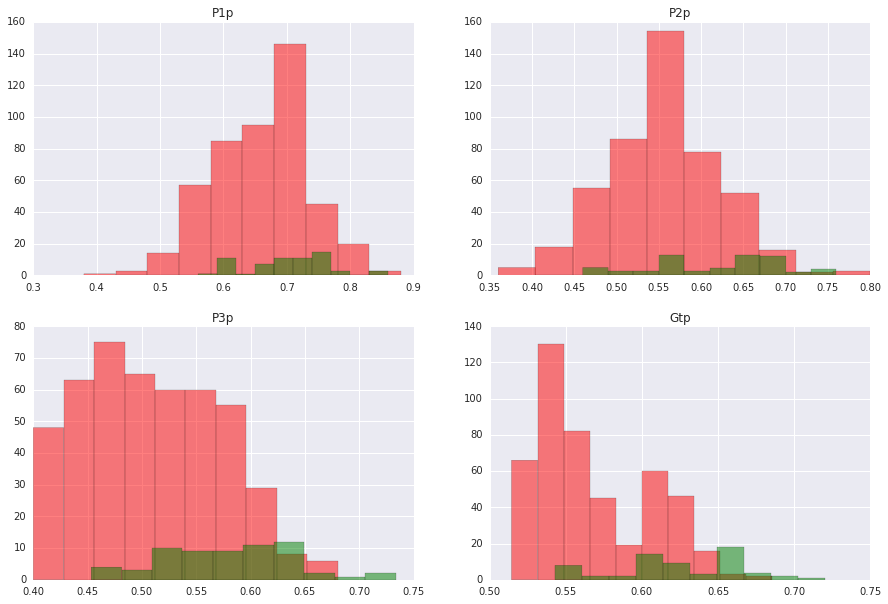

In [93]:
plot_marks_by_x(cdf, 'Status')

- This is misleading as it has all categories. (Different cutoffs for each category)

[('AP', 'red'), ('JRF_AP', 'green')]


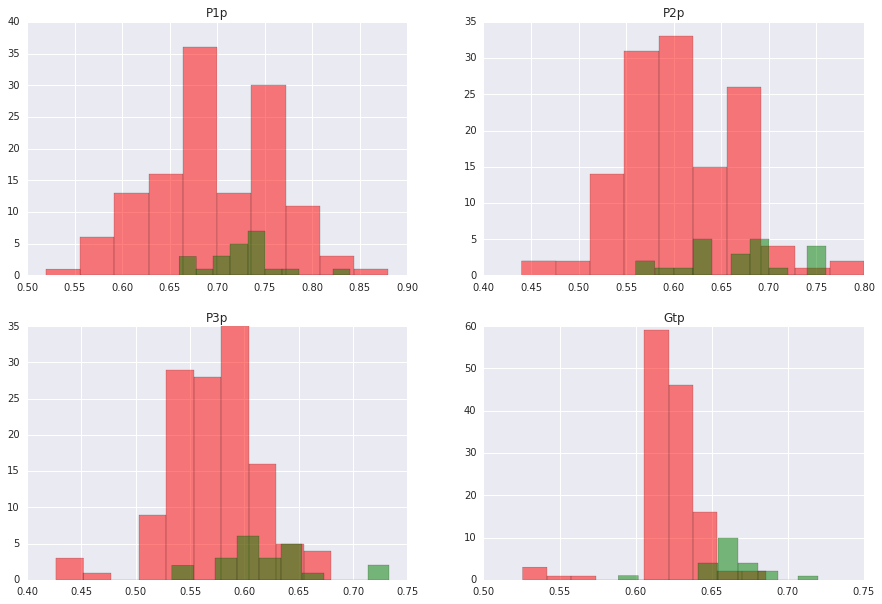

In [111]:
plot_marks_by_x(cdf.loc[cdf.notReserved], 'Status')

- Here we clearly see the demarcation in the Grand Total Percentage. you need at least 65% to qualify for JRF
- Let us see for other categories which are reserved. Due to a lack of number of candidates in the SC and ST categories we will club them.

[('AP', 'red'), ('JRF_AP', 'green')]


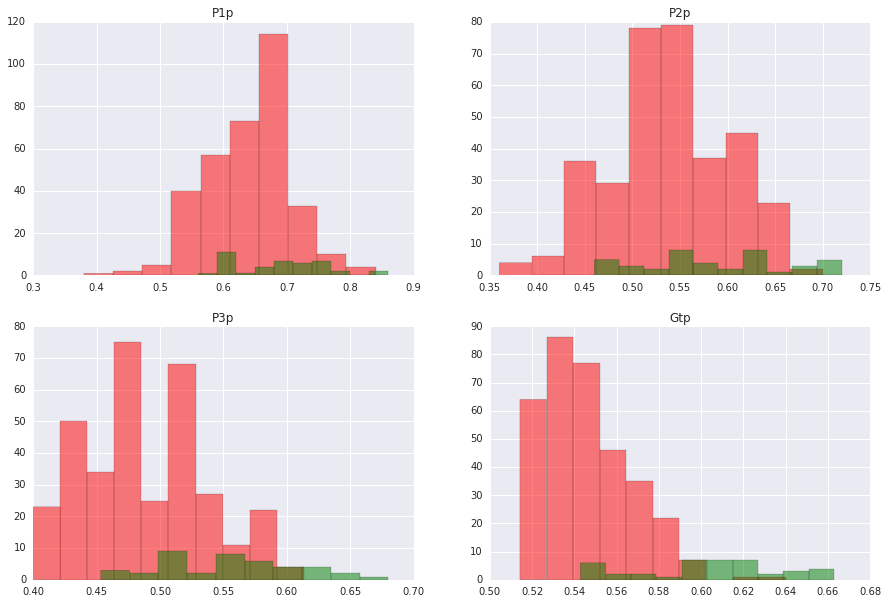

In [112]:
plot_marks_by_x(cdf.loc[~ cdf.notReserved], 'Status')

In [117]:
(pd.crosstab(cdf.PWDApplFor, cdf.Status)).apply(lambda x:x/x.sum(), axis=1)

Status,AP,JRF_AP
PWDApplFor,,
B,0.853147,0.146853
L,1.000000,0.000000


In [118]:
(pd.crosstab(cdf.Caty, cdf.Status)).apply(lambda x:x/x.sum(), axis=1)

Status,AP,JRF_AP
Caty,,
GEN,0.855263,0.144737
OBC,0.904025,0.095975
SC,0.816327,0.183673
ST,0.875000,0.125000


# Lessons learnt

- It's tough if you are GEN
- Sex does not matter
- Paper 3 is important
- Paper 1 is for pulling up marks and does not denote caliber
- You need to secure 65% (70% to be sure) for getting JRF
- 65% = 338 marks total
- 70% = 245 marks total

**Note: ** Don't forget that this data is only for those who clear the first cutoff of 15%. See the instructions for the 4 stages of cutoffs.